In [1]:
from __future__ import print_function, division, absolute_import
import os
import sys
sys.path.insert(0, "C:\\Users\\Matt\\Desktop\\orbithunter\\")
import orbithunter as orb
import numpy as np
import itertools
from math import pi
import time
import matplotlib.pyplot as plt

# Fundamental orbits

Application of the clipping method to the collection of orbits found via numerical optimization
provided us with a handful of fundamental orbits; upon inspection it seems that
only three are unique, the rest lie in the continuous families populated by numerical continuation.

In [2]:
s, w, m = orb.read_h5('./data/tiles.h5', ('default/streak', 'default/wiggle', 'default/defect'))

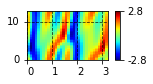

In [3]:
defect_original = orb.read_h5("./data/RelativeOrbitKS.h5", "t12p836_x28p614")
defect_original.plot()

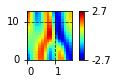

In [4]:
defect_clipping = orb.clip(defect_original.change_reference_frame(frame='physical')
                        , ((None, None),(0.5, 2.2)), frame='physical')
defect_clipping.plot()
defect_clipping = defect_clipping.change_reference_frame(frame='comoving').resize(16, 16).transform(to='modes')


-------------------------------------------------------------------------------------------------
Starting adjoint descent
Initial guess : RelativeOrbitKS({"shape": [15, 14], "basis": "modes", "parameters": [12.836, 14.307, -4.097]})
Constraints : {'t': False, 'x': False, 's': False}
Initial cost : 379.4921796342131
Target cost tolerance : 1e-06
Maximum iteration number : 10000
-------------------------------------------------------------------------------------------------
#################################################
 Residual=0.0147692 after 5000 adjoint descent steps. Parameters=(12.82495971250659, 14.307580584411303, -3.8622492874100898)
#################################################
------------------------------------------------------------------------------------------------
Starting lsmr optimization
Initial guess : RelativeOrbitKS({"shape": [15, 14], "basis": "modes", "parameters": [12.805, 14.308, -3.842]})
Constraints : {'t': False, 'x': False, 's': False}
Initial 

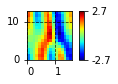

In [6]:
defres = orb.hunt(defect_clipping, methods=('adj', 'lsmr'), preconditioning=True, 
                  pexp=(1,4), verbose=True)

defect_clipping.plot(fundamental_domain=True)

In [ ]:
mask_orbit(defect_original, ((None, None),(0.5, 2.2)), mask_region='interior').plot(padding=False, fundamental_domain=False)
mask_orbit(defect_original, ((None, None),(0.5, 2.2)), mask_region='exterior').plot(padding=False, fundamental_domain=False)
defect_clipping.plot()
defect_clipping.change_reference_frame(to='comoving').plot(fundamental_domain=False)
defect_original.plot(fundamental_domain=False)
mask_orbit(defect_original, ((None, None),(0.4, 2.2)), mask_region='interior').plot(padding=False, fundamental_domain=False)
mask_orbit(defect_original, ((None, None),(0.4, 2.2)), mask_region='exterior').plot(padding=False, fundamental_domain=False)

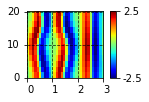

In [31]:
orb.read_h5('./data/OrbitKS.h5', 't54p126_x26p744').transform(to='field').roll(-2, axis=0)[-12:, :].plot()

In [32]:
clipped = orb.read_h5('./data/OrbitKS.h5', 't54p126_x26p744').transform(to='field').roll(-2, axis=0)[-12:, :]

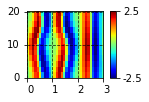

In [33]:
clipped.plot()

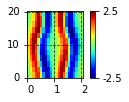

In [39]:
wiggle = clipped[:, :22]
wiggle.plot()

In [48]:
wiggle = orb.AntisymmetricOrbitKS(**vars(wiggle))

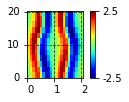

In [49]:
wiggle.plot()


-------------------------------------------------------------------------------------------------
Starting lstsq optimization
Initial guess : AntisymmetricOrbitKS({"shape": [11, 10], "basis": "modes", "parameters": [20.298, 18.387, 0.0]})
Constraints : {'t': False, 'x': False, 's': True}
Initial cost : 97.80394723004743
Target cost tolerance : 1e-06
Maximum iteration number : 500
-------------------------------------------------------------------------------------------------
####
Converged. Terminating hunt with cost  Terminating hunt with cost = 1.714669372086274e-11


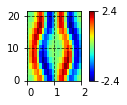

In [54]:
wiggle_res = orb.hunt(wiggle.transform(to='modes'), verbose=True, methods='lstsq')
wiggle_res.orbit.plot()


-------------------------------------------------------------------------------------------------
Starting lstsq optimization
Initial guess : EquilibriumOrbitKS({"shape": [1, 4], "basis": "modes", "parameters": [20.298, 8.358, 0.0]})
Constraints : {'t': False, 'x': False, 's': True}
Initial cost : 11.224562842597713
Target cost tolerance : 1e-06
Maximum iteration number : 500
-------------------------------------------------------------------------------------------------
#######
Converged. Terminating hunt with cost  Terminating hunt with cost = 4.0775690699662674e-07


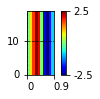

In [53]:
streak = clipped[:, 22:]
streak = orb.EquilibriumOrbitKS(**vars(streak))
streak_res = orb.hunt(streak.transform(to='modes'), verbose=True, methods='lstsq')
streak_res.orbit.plot()

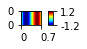

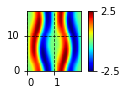

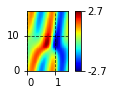

In [8]:
_ = s.plot(fundamental_domain=False), w.plot(fundamental_domain=False), m.plot()

The claim is that these represent the fundamental patterns of the Kuramoto-Sivashinsky equation. How fundamental
are these patterns, truly? 

In [7]:
half_wiggle_streak = orb.continuation(s.transform(to='modes'),  {'x':w.x/2}, axis=1, step_size=0.1, 
                       method='lstsq').orbit.resize(32,32).transform(to='field')
slanted_streak = orb.RelativeOrbitKS(**{**vars(half_wiggle_streak))

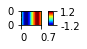

In [16]:
half_wiggle_streak.plot()

In [12]:
slanted_streak.frame

'comoving'

C:\Users\Matt\Desktop\orbithunter\orbithunter\ks\orbits.py:2724: RuntimeWarning: invalid value encountered in double_scalars
  translation_per_period = shift / self.t


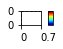

In [13]:
slanted_streak.plot(fundamental_domain=True)

In [23]:
from orbithunter.ks.orbits import temporal_frequencies

In [18]:
slanted = slanted_streak.rotate(0.1, axis=1)
slanted.t = w.t / 4
slanted.S = -pi*np.sqrt(2)/2
slanted = slanted.rotate(0.01, axis=1)
slanted.reflection().plot(fundamental_domain=True)
slanted.plot(fundamental_domain=True)

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [13]:
wfd_from_s = glue(np.array([[slanted.change_reference_frame(to='physical')],
               [slanted.reflection().change_reference_frame(to='physical')]]), OrbitKS)

s2w = glue(np.array([[wfd_from_s.reflection(), wfd_from_s]]), OrbitKS)

s2w.plot(filename='s2w_short.pdf', directory='../../data/local/orbithunter_thesis/fundamental/')
# s2w.plot(filename='s2w_middle.pdf', directory='../../data/local/orbithunter_thesis/fundamental/')
# s2w.plot(filename='s2w_long.pdf', directory='../../data/local/orbithunter_thesis/fundamental/')

s2w_result =  converge(convert_class(s2w.rescale(5).reshape(16,16).reshape(32,16).transform(to='modes'), 
                                     AntisymmetricOrbitKS), method='hybrid', 
                                     preconditioning=True, pexp=(1,4), verbose=True) 

s2w_result.orbit.plot()

s2w_result.orbit.plot(filename='s2w_short_result.pdf', directory='../../data/local/orbithunter_thesis/fundamental/')
# s2w_result.orbit.plot(filename='s2w_middle_result.pdf', directory='../../data/local/orbithunter_thesis/fundamental/')
# s2w_result.orbit.plot(filename='s2w_long_result.pdf', directory='../../data/local/orbithunter_thesis/fundamental/')

s12r.plot(fundamental_domain=False)

s13r.plot(fundamental_domain=False)

defect_from_streaks = glue(np.array([[s12r],[s13r]]),
                           RelativeOrbitKS,
                           frame='physical')
defect_from_streaks.t = m.t

defect_from_streaks = defect_from_streaks.change_reference_frame(to='comoving')

s2d = defect_from_streaks.reshape(16,16).reshape(32,16).transform(to='modes')

s2d.plot(fundamental_domain=True)

s2d.plot(filename='s2d_initial.pdf', directory='../../data/local/orbithunter_thesis/fundamental/', fundamental_domain=True)

d_from_s_result =  converge(s2d, method='hybrid', preconditioning=True, pexp=(1,4), verbose=True) 

d_from_s_result.orbit.plot(filename='s2d_final.pdf', directory='../../data/local/orbithunter_thesis/fundamental/', fundamental_domain=True)

NameError: name 'glue' is not defined